In [69]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [70]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_0.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_0.pkl', 'rb') as f:
    group1 = pickle.load(f)

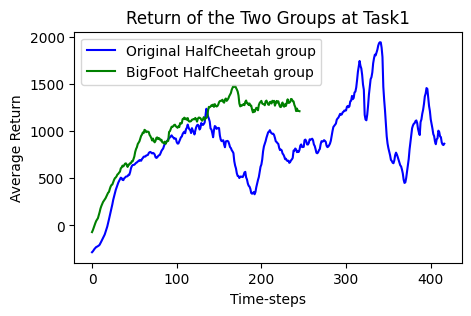

In [71]:
plt.figure(figsize=(5, 3))

plt.plot(group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

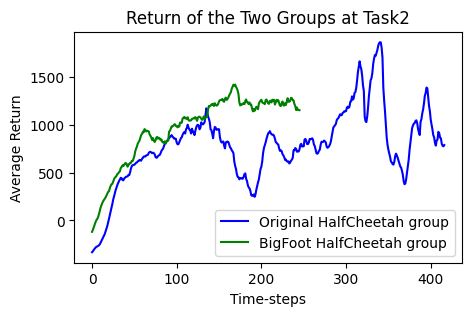

In [72]:
plt.figure(figsize=(5, 3))

plt.plot(group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [73]:
g0 = pd.DataFrame()
g0['time'] = group0['time']
g0['group0 AvgR1'] = group0['AvgR']
g0['group0 AvgR2'] = group0['AvgR2']

g1 = pd.DataFrame()
g1['time'] = group1['time']
g1['group1 AvgR1'] = group1['AvgR']
g1['group1 AvgR2'] = group1['AvgR2']

all_groups = pd.concat([g0, g1]).sort_values('time').reset_index()

# forward fill the first group and backward fill the second group
# (because the second group starts with Nan values).
all_groups['group0 AvgR1'] = all_groups['group0 AvgR1'].fillna(method='ffill')
all_groups['group1 AvgR1'] = all_groups['group1 AvgR1'].fillna(method='bfill').fillna(method='ffill')

all_groups['group0 AvgR2'] = all_groups['group0 AvgR2'].fillna(method='ffill')
all_groups['group1 AvgR2'] = all_groups['group1 AvgR2'].fillna(method='bfill').fillna(method='ffill')

all_groups['group fairness gap AvgR1'] = np.abs(all_groups['group0 AvgR1'] - all_groups['group1 AvgR1'])
all_groups['group fairness gap AvgR2'] = np.abs(all_groups['group0 AvgR2'] - all_groups['group1 AvgR2'])

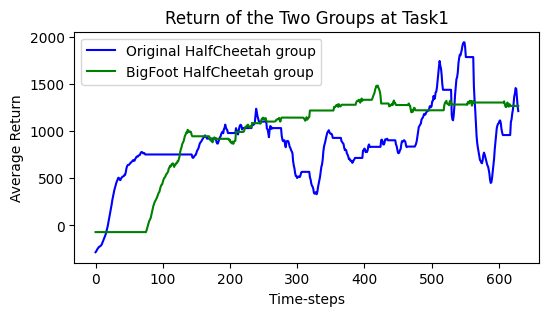

In [65]:
plt.figure(figsize=(6, 3))

plt.plot(all_groups['group0 AvgR1'],label='Original HalfCheetah group', color='blue')
plt.plot(all_groups['group1 AvgR1'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

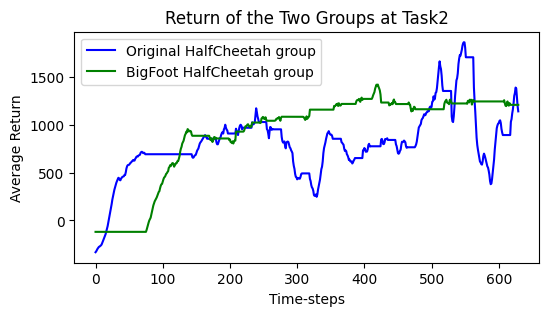

In [66]:
plt.figure(figsize=(6, 3))

plt.plot(all_groups['group0 AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(all_groups['group1 AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

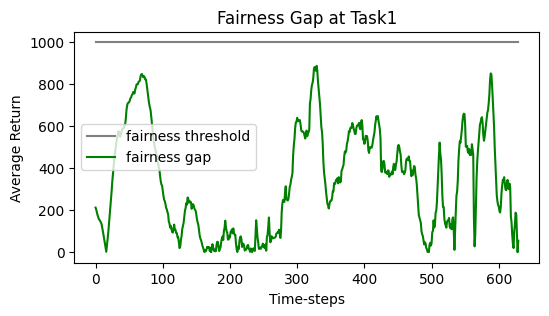

In [67]:
plt.figure(figsize=(6, 3))

plt.plot([1000]*len(all_groups), label='fairness threshold', color='grey')
plt.plot(all_groups['group fairness gap AvgR1'], label='fairness gap', color='green')

plt.title("Fairness Gap at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()



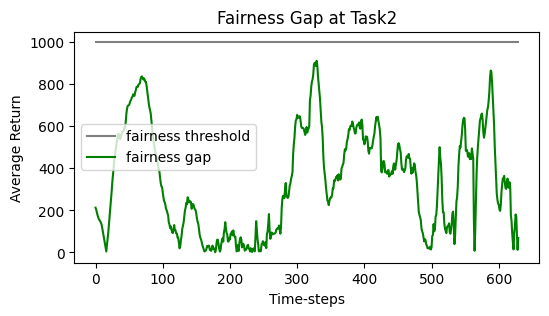

In [68]:
plt.figure(figsize=(6, 3))

plt.plot([1000]*len(all_groups), label='fairness threshold', color='grey')
plt.plot(all_groups['group fairness gap AvgR2'], label='fairness gap', color='green')

plt.title("Fairness Gap at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

